In [257]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../')
sys.path.insert(0, '../driftpy/src/')

import pandas as pd 
import numpy as np 

pd.options.plotting.backend = "plotly"

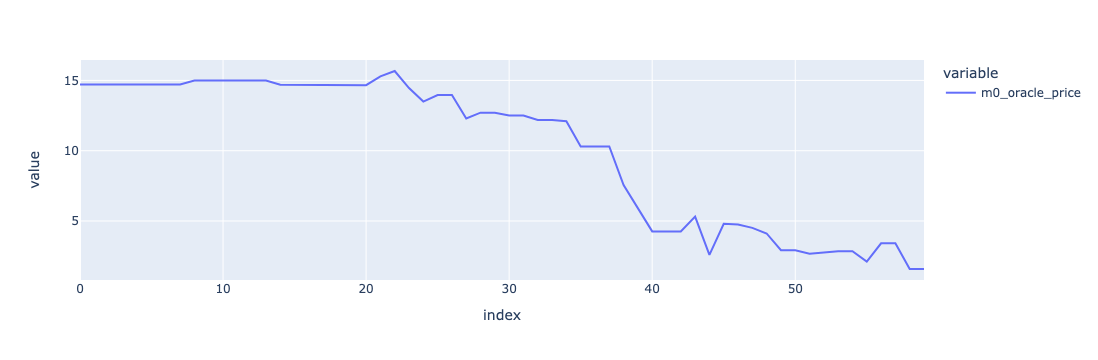

In [258]:
df = pd.read_csv('leverage10x/chs.csv')
df.columns
df['m0_oracle_price'].plot()

In [259]:
result = pd.read_csv('leverage10x/result_market0.csv')
print(result.shape)

(86, 102)


In [244]:
df.shape

(60, 653)

In [245]:
str(result.columns.tolist())

"['pubkey', 'amm', 'pnl_pool', 'expiry_price', 'number_of_users', 'imf_factor', 'unrealized_pnl_imf_factor', 'unrealized_pnl_max_imbalance', 'liquidator_fee', 'if_liquidation_fee', 'insurance_claim', 'expiry_ts', 'next_fill_record_id', 'next_funding_rate_record_id', 'next_curve_record_id', 'margin_ratio_initial', 'margin_ratio_maintenance', 'unrealized_pnl_initial_asset_weight', 'unrealized_pnl_maintenance_asset_weight', 'market_index', 'status', 'contract_type', 'contract_tier', 'oracle', 'historical_oracle_data', 'market_position_per_lp', 'fee_pool', 'last_oracle_normalised_price', 'last_oracle_reserve_price_spread_pct', 'base_asset_reserve', 'quote_asset_reserve', 'concentration_coef', 'min_base_asset_reserve', 'max_base_asset_reserve', 'sqrt_k', 'peg_multiplier', 'terminal_quote_asset_reserve', 'base_asset_amount_long', 'base_asset_amount_short', 'base_asset_amount_with_amm', 'base_asset_amount_with_unsettled_lp', 'quote_asset_amount_long', 'quote_asset_amount_short', 'quote_entry_

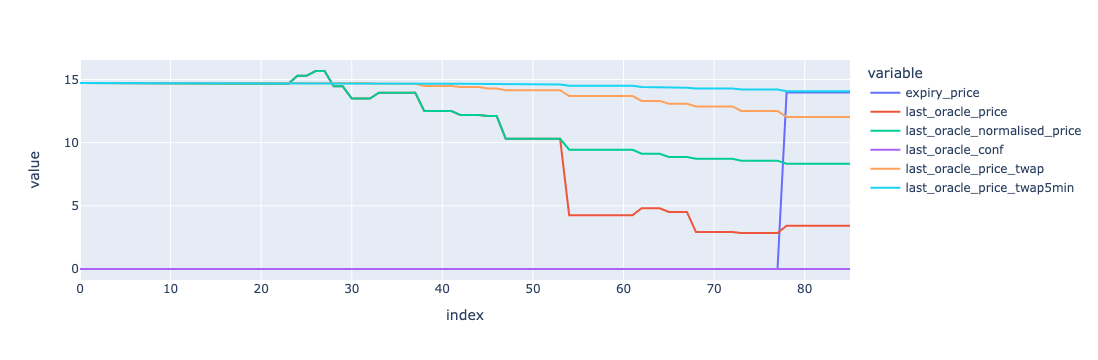

In [250]:
(result[['expiry_price', 
         'last_oracle_price',
         'last_oracle_normalised_price',
         'last_oracle_conf',
         'last_oracle_price_twap',
         'last_oracle_price_twap5min',
        ]]/1e6).plot()

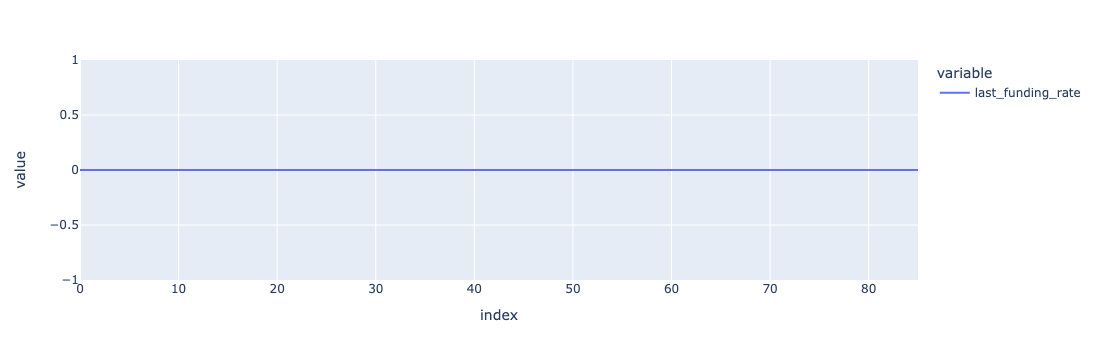

In [254]:
result['last_funding_rate'].plot()

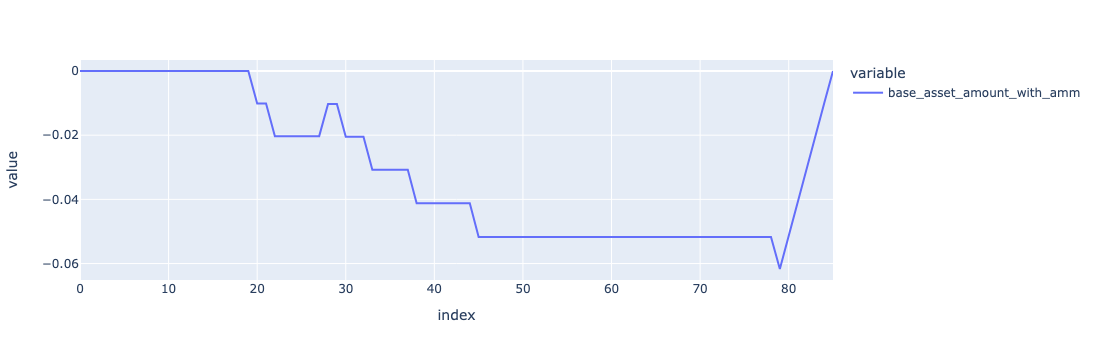

In [247]:
(result.base_asset_amount_with_amm/1e9).plot()

In [256]:
result.funding_period

0     60
1     60
2     60
3     60
4     60
      ..
81    60
82    60
83    60
84    60
85    60
Name: funding_period, Length: 86, dtype: int64

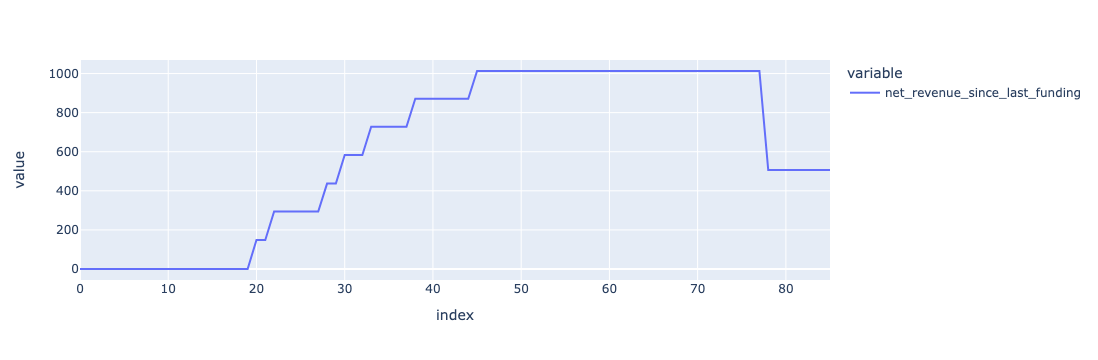

In [255]:
result.net_revenue_since_last_funding.plot()

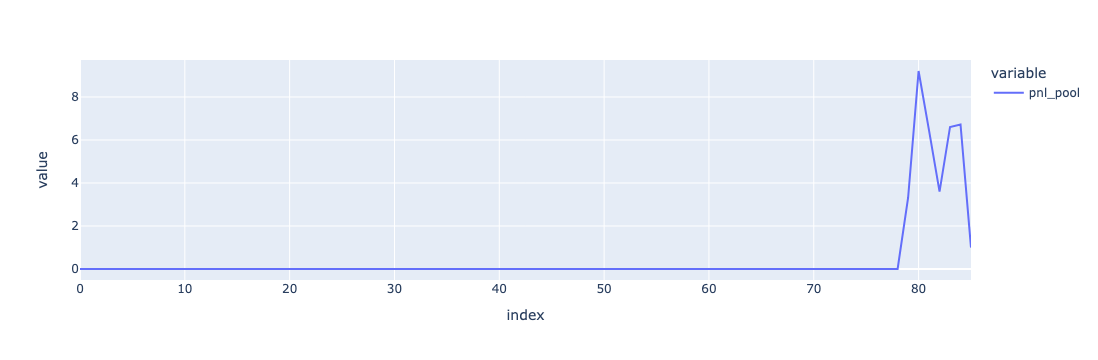

In [249]:
(result.pnl_pool.apply(lambda x: x.split('balance=')[-1].split(',')[0]).astype(float)/1e6).plot()